In [1]:
# Brain Tumor Detection - Pituitary Tumor

### Load Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### Prepare/collect data

In [6]:
import os

path = os.listdir('Training')
classes = {'no_tumor':0, 'pituitary_tumor':1}

In [23]:
import cv2
X = []
Y = []
for cls in classes:

    pth = 'Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4152: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [ ]:
X = np.array(X)
Y = np.array(Y)

In [ ]:
np.unique(Y)

In [ ]:
pd.Series(Y).value_counts()

In [ ]:
X.shape

### Visualize data

In [ ]:
plt.imshow(X[0], cmap='gray')

### Prepare data

In [ ]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

### Split Data

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=10,
                                               test_size=.20)

In [ ]:
xtrain.shape, xtest.shape

### Feature Scaling

In [ ]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

### Feature Selection: PCA

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
# pca_train = pca.fit_transform(xtrain)
# pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

In [ ]:
# print(pca_train.shape, pca_test.shape)
# print(pca.n_components_)
# print(pca.n_features_)

### Train Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)


In [ ]:
sv = SVC()
sv.fit(pca_train, ytrain)

### Evaluation

In [ ]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

In [ ]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

### Prediction

In [ ]:
pred = sv.predict(pca_test)
np.where(ytest!=pred)

In [ ]:
pred[36]

In [21]:
ytest[36]

NameError: name 'ytest' is not defined

### TEST MODEL

In [265]:
dec = {0:'No Tumor', 1:'Positive Tumor'}

Failed to load image: /content/sample_data/brain_tumor/Testing/no_tumor/.ipynb_checkpoints


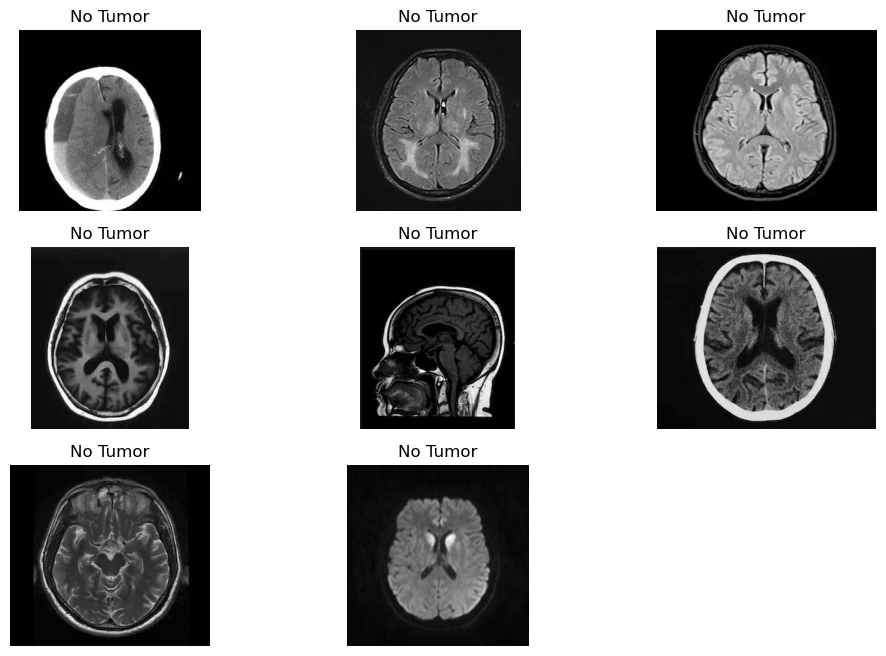

In [139]:


import cv2
import os
import matplotlib.pyplot as plt
from sklearn.svm import SVC

dec = {0:'No Tumor', 1:'Positive Tumor'}
plt.figure(figsize=(12,8))
p = os.listdir('Testing')
c=1
for i in os.listdir('Testing/no_tumor')[:9]:
    plt.subplot(3,3,c)

    # Add a '/' between the directory and filename
    img = cv2.imread('Testing/no_tumor/'+i,0)

    # Check if image was loaded successfully
    if img is not None:
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1,-1)/255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c+=1
    else:
        print(f"Failed to load image: /content/sample_data/brain_tumor/Testing/no_tumor/{i}")

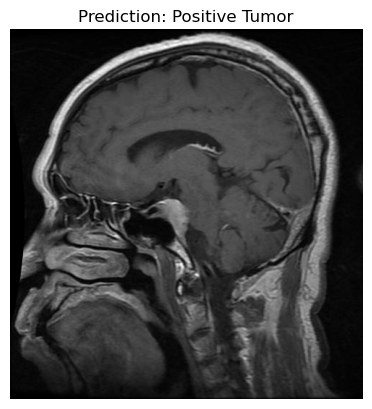

In [140]:


import cv2
import matplotlib.pyplot as plt

def predict_tumor(image_path):

  img = cv2.imread(image_path, 0)
  if img is None:
    return "Error: Could not load image."

  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1) / 255
  prediction = sv.predict(img1)  # Use the trained SVM model (sv)
  dec = {0: 'No Tumor', 1: 'Positive Tumor'}
  return dec[prediction[0]]


image_path = 'Testing/pituitary_tumor/image(1).jpg'
result = predict_tumor(image_path)

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


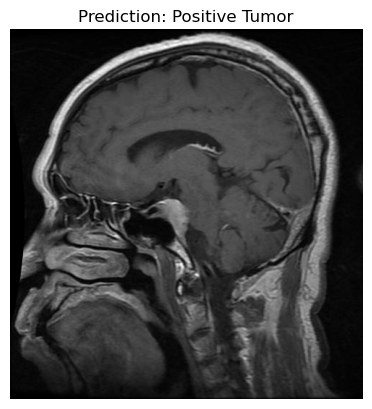

In [331]:
import cv2
import matplotlib.pyplot as plt

def predict_tumor(image_path):

  img = cv2.imread(image_path, 0)
  if img is None:
    return "Error: Could not load image."

  img1 = cv2.resize(img, (200, 200))
  img1 = img1.reshape(1, -1) / 255
  prediction = sv.predict(img1)  # Use the trained SVM model (sv)
  dec = {0: 'No Tumor', 1: 'Positive Tumor'}
  return dec[prediction[0]]


image_path = 'Testing/pituitary_tumor/image(1).jpg'
result = predict_tumor(image_path)

img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()


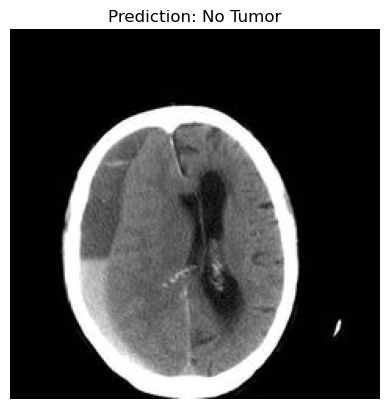

In [333]:
image_path = 'Testing/no_tumor/image(1).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

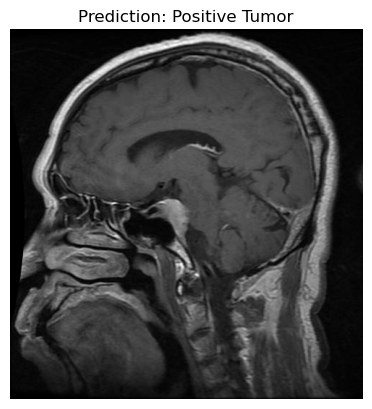

In [268]:
image_path = 'Testing/pituitary_tumor/image(2).jpg'
result = predict_tumor(image_path)


# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

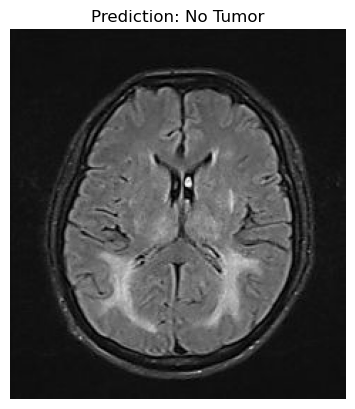

In [143]:
image_path = 'Testing/no_tumor/image(10).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

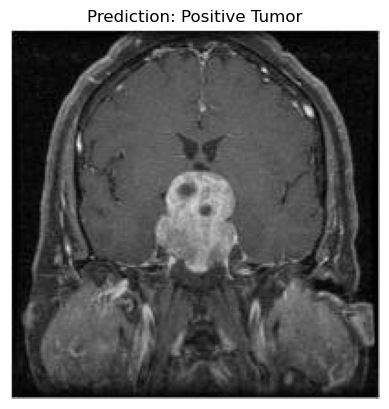

In [144]:
image_path ='Testing/pituitary_tumor/image(13).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

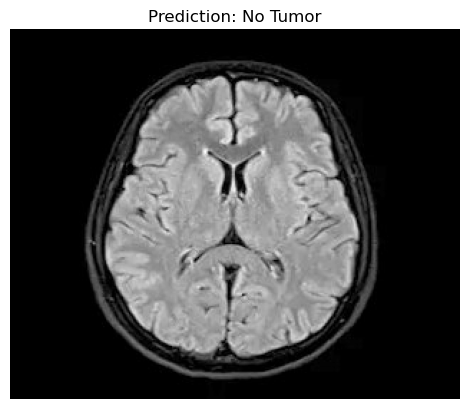

In [145]:
image_path ='Testing/no_tumor/image(100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

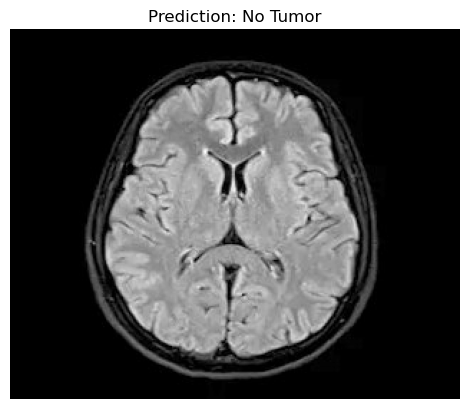

In [146]:
image_path ='Testing/no_tumor/image(100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()

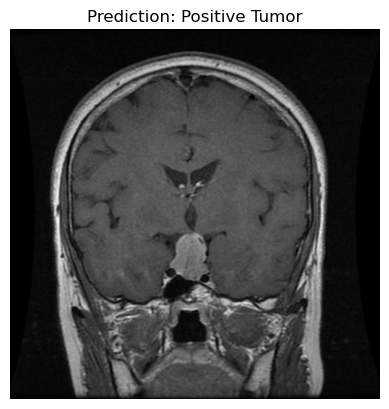

In [322]:
image_path ='Training/pituitary_tumor/p (100).jpg'
result = predict_tumor(image_path)

# Display the image
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.title(f"Prediction: {result}")
plt.axis('off')
plt.show()